In [1]:
data_path = '/Users/watson-parris/Dropbox/Work/CIS/User workshop/WorkshopData2016/'

In [2]:
# Ensure I don't use any local plugins. Set it to a readable folder with no Python files to avoid warnings.
%env CIS_PLUGIN_HOME=/Users/watson-parris/Pictures
# Setup matplotlib
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 10.0)
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

env: CIS_PLUGIN_HOME=/Users/watson-parris/Pictures


# CIS Demo

CIS has it's own version of the Iris Cube. But it's designed to work with any observational data. The CIS data structure is just called UngriddedData:

<img src="images/ungridded_data.png" width="640"/>

## Aerosol CCI

In [3]:
# Read all of the AOD satelite variables
from cis import read_data, read_data_list

aerosol_cci = read_data_list(data_path + 'AerosolCCI', 'AOD*0')

In [4]:
print(aerosol_cci)   

UngriddedDataList: 
0: Ungridded data: AOD550 / (1) 
1: Ungridded data: AOD670 / (1) 
2: Ungridded data: AOD870 / (1) 
3: Ungridded data: AOD1600 / (1) 
Coordinates: 
  longitude
  latitude
  time



In [5]:
aerosol_cci_550 = aerosol_cci[0]
print(aerosol_cci_550)

Ungridded data: AOD550 / (1) 
     Shape = (6299107,)

     Total number of points = 6299107
     Number of non-masked points = 1662403
     Long name = aerosol optical thickness at 550 nm
     Standard name = atmosphere_optical_thickness_due_to_aerosol
     Units = 1
     Missing value = -999.0
     Range = (0.0099999998, 5.0111136)
     History = 
     Misc attributes: 
       Coordinates = latitude longitude time
       Valid_Range = [ 0.01        5.01186991]
       _Fillvalue = -999.0
     Coordinates: 
       longitude
          Long name = Longitude at pixel centre
          Standard name = longitude
          Units = degrees_east
          Missing value = -999.0
          Range = (-180.0, 179.99994)
          History = 
          Misc attributes: 
            Valid_Range = [-180.  180.]
            _Fillvalue = -999.0
       latitude
          Long name = Latitude at pixel centre
          Standard name = latitude
          Units = degrees_north
          Missing value = -999.0


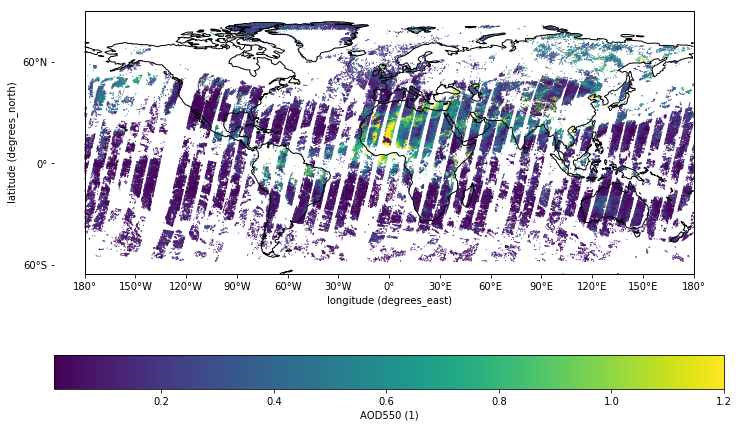

In [6]:
# Takes about 2 seconds
aerosol_cci_550[::10].plot(itemwidth=1, vmax=1.2)

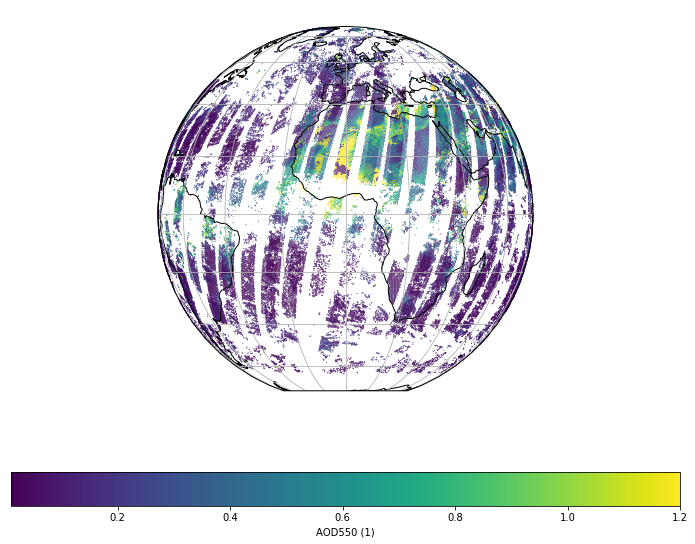

In [7]:
aerosol_cci_550[::10].plot(projection='Orthographic', itemwidth=1, 
                           vmax=1.2)

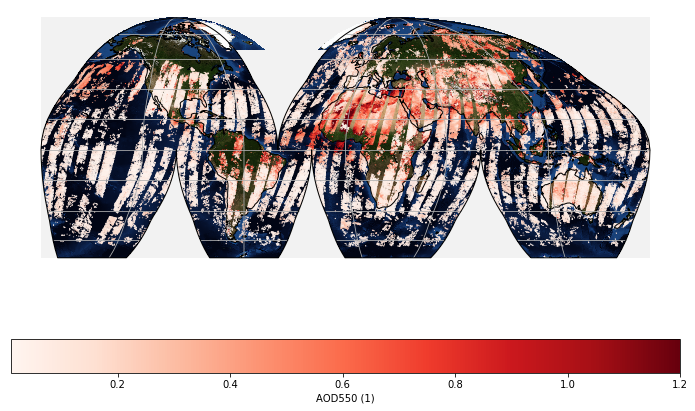

In [8]:
ax=aerosol_cci_550[::10].plot(projection='InterruptedGoodeHomolosine', 
                              vmax=1.2, itemwidth=1, cmap='Reds')
ax.bluemarble()

## Aggregation

Given a set of UngriddedData...

<img src="images/ungridded_aggregation_1.png" width="640"/>

... we can perform an aggregation over a specified grid...

<img src="images/ungridded_aggregation_2.png" width="640"/>

... to create a new GriddedData object (which is essentiall an Iris Cube)

<img src="images/ungridded_aggregation_3.png" width="640"/>

In [9]:
g_aerosol_cci = aerosol_cci_550.aggregate(x=[-180,180,10],
                                          y=[-90,90,5])

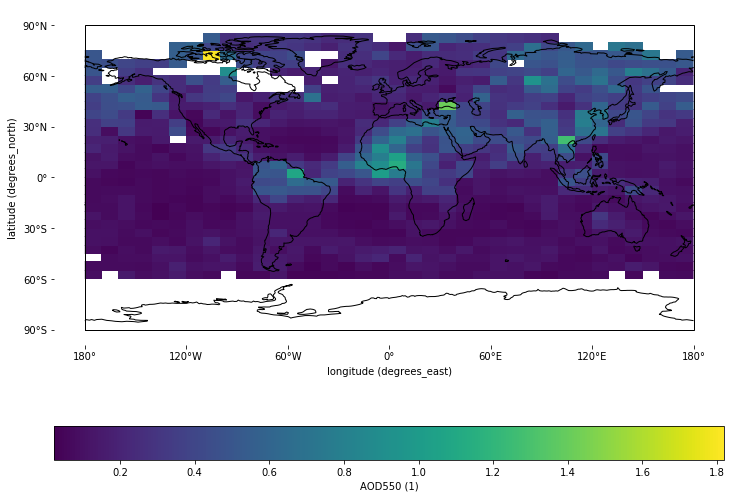

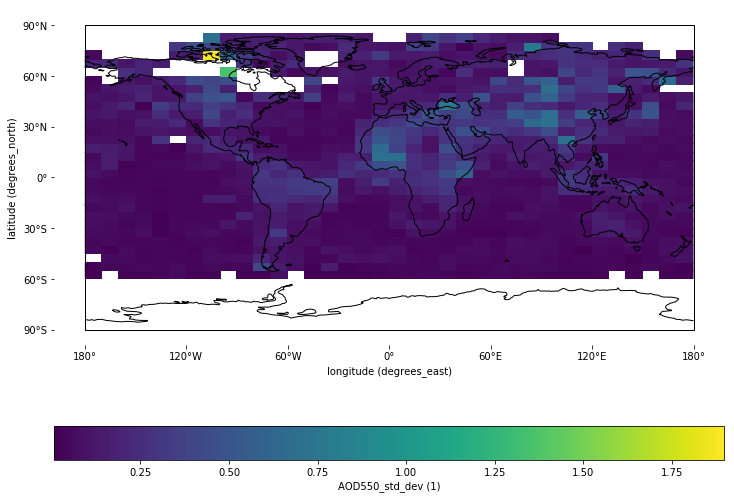

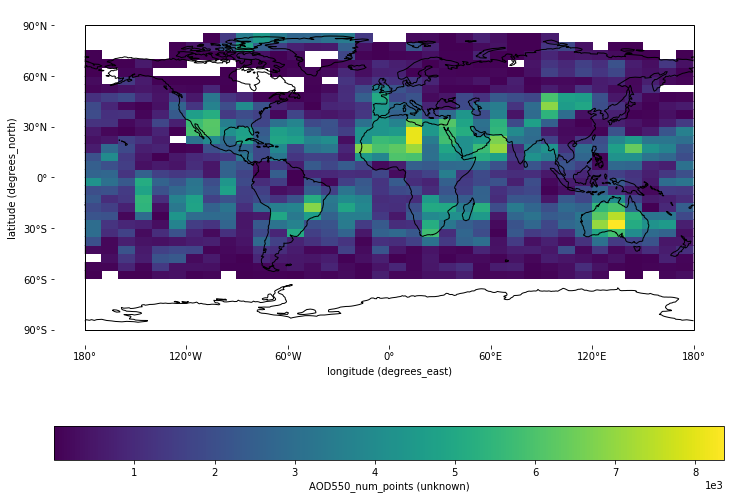

In [10]:
for g in g_aerosol_cci:
    g.plot()

## Collocation

<img src="images/collocation_options.png" width="640"/>

### Aircraft onto satellite

<img src="images/aircraft_onto_satellite.png" width="640"/>

As you can see the difficulty here is the sparseness of the aircraft data, and actually of the satellite data in this region.

This is an ungridded to ungridded collocation:

<img src="images/ungridded_ungridded_collocation.png" width="640" />

In [11]:
number_concentration = read_data(data_path + 
                                 'ARCPAC_2008', 
                                 'NUMBER_CONCENTRATION')

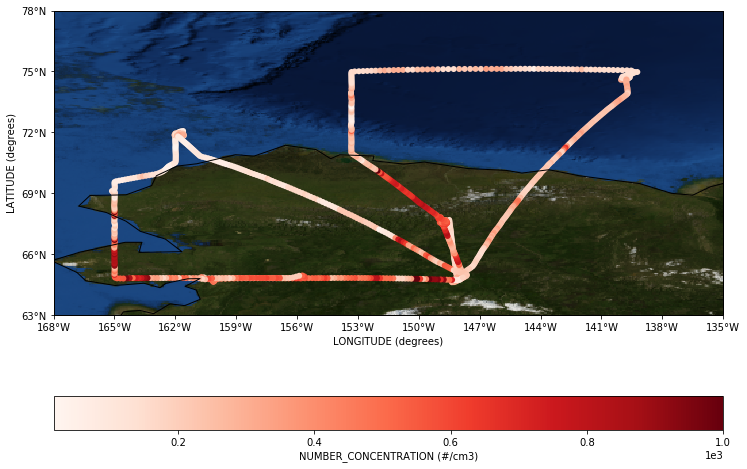

In [12]:
ax = number_concentration.plot(vmax=1000, cmap='Reds')
ax.bluemarble() 

In [13]:
# Subset to the region of interest
aoerosol_cci_Alaska = aerosol_cci.subset(x=[-170,-100],
                                         y=[35,80])

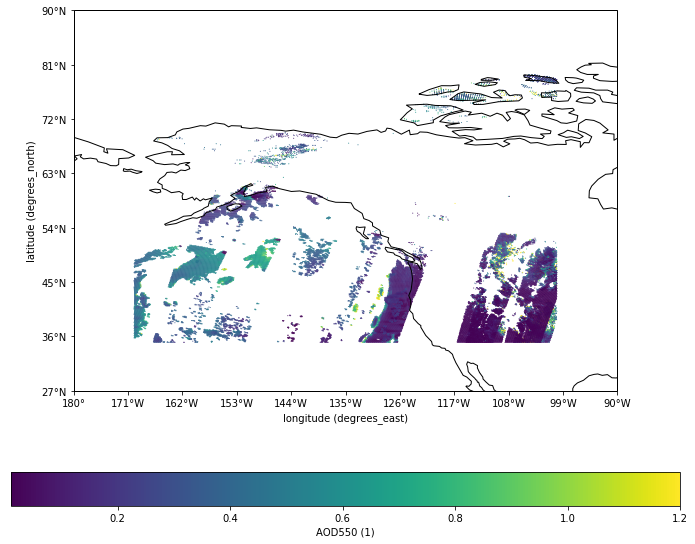

In [14]:
aoerosol_cci_Alaska[0].plot(itemwidth=1, vmax=1.2)

In [15]:
aerosol_cci_collocated = \
number_concentration.collocated_onto(aoerosol_cci_Alaska[0], 
                                    h_sep=10, t_sep='P1D')

In [16]:
aerosol_cci_collocated.append(aoerosol_cci_Alaska[0])
print(aerosol_cci_collocated)

UngriddedDataList: 
0: Ungridded data: NUMBER_CONCENTRATION / (#/cm3) 
1: Ungridded data: NUMBER_CONCENTRATION_std_dev / (#/cm3) 
2: Ungridded data: NUMBER_CONCENTRATION_num_points / (unknown) 
3: Ungridded data: AOD550 / (1) 
Coordinates: 
  longitude
  latitude
  time



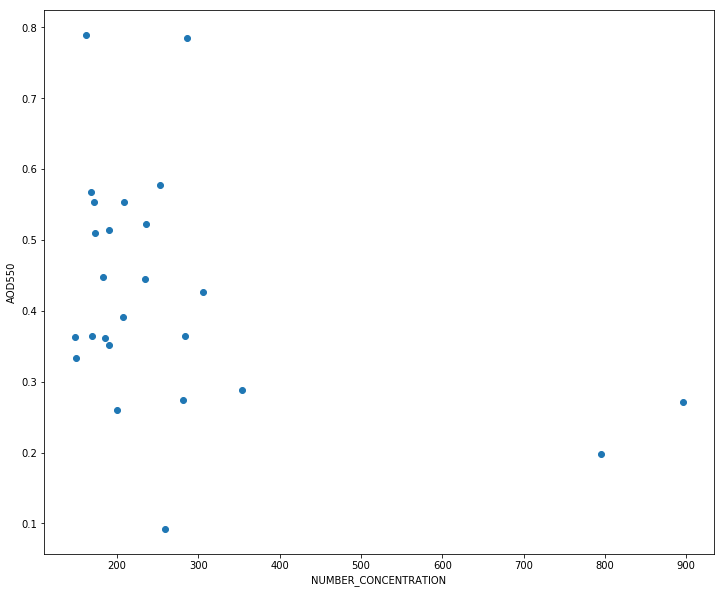

In [17]:
aerosol_cci_collocated[0:4:3].plot('comparativescatter')

### CIS and Pandas

In [18]:
df = aerosol_cci_collocated.as_data_frame()
print(df)

                      latitude   longitude  NUMBER_CONCENTRATION  \
2008-04-11 00:53:26  76.616768 -169.967896                   NaN   
2008-04-11 00:53:24  76.706589 -169.923553                   NaN   
2008-04-11 00:53:24  76.706589 -169.532913                   NaN   
2008-04-11 00:53:24  76.706589 -169.142288                   NaN   
2008-04-11 00:53:23  76.796410 -169.879028                   NaN   
2008-04-11 00:53:22  76.796410 -169.485794                   NaN   
2008-04-11 00:53:21  76.796410 -169.092560                   NaN   
2008-04-11 00:53:21  76.796410 -168.699310                   NaN   
2008-04-11 00:53:22  76.886230 -169.834335                   NaN   
2008-04-11 00:53:21  76.886230 -169.438446                   NaN   
2008-04-11 00:53:20  76.886230 -169.042572                   NaN   
2008-04-11 00:53:19  76.886230 -168.646683                   NaN   
2008-04-11 00:53:18  76.886230 -168.250793                   NaN   
2008-04-11 00:53:21  76.976051 -169.789459      

In [19]:
df.corr()
# Then do a pretty plot of it...
# This is a nice segway into the Pandas lesson.

,latitude,longitude,NUMBER_CONCENTRATION,NUMBER_CONCENTRATION_std_dev,NUMBER_CONCENTRATION_num_points,AOD550
latitude,1.000000,-0.013800,0.113579,-0.313949,-0.321446,0.229346
longitude,-0.013800,1.000000,-0.179763,0.184222,-0.032048,-0.253933
NUMBER_CONCENTRATION,0.113579,-0.179763,1.000000,0.980905,0.165776,-0.373297
NUMBER_CONCENTRATION_std_dev,-0.313949,0.184222,0.980905,1.000000,0.531451,-0.294705
NUMBER_CONCENTRATION_num_points,-0.321446,-0.032048,0.165776,0.531451,1.000000,-0.286190
AOD550,0.229346,-0.253933,-0.373297,-0.294705,-0.286190,1.000000


# Model interpolation

In [20]:
model_aod = read_data(data_path + "od550aer.nc",
                      "od550aer")
print(model_aod)

od550aer / (1)                      (time: 1464; latitude: 96; longitude: 192)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified ECMWF rad

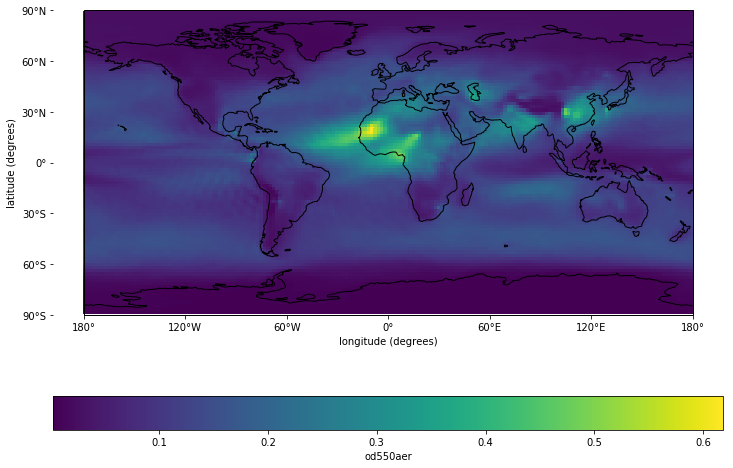

In [21]:
model_aod.collapsed('time', how='mean').plot()

In [22]:
model_onto_aerosol_cci, = model_aod.collocated_onto(aerosol_cci_550)

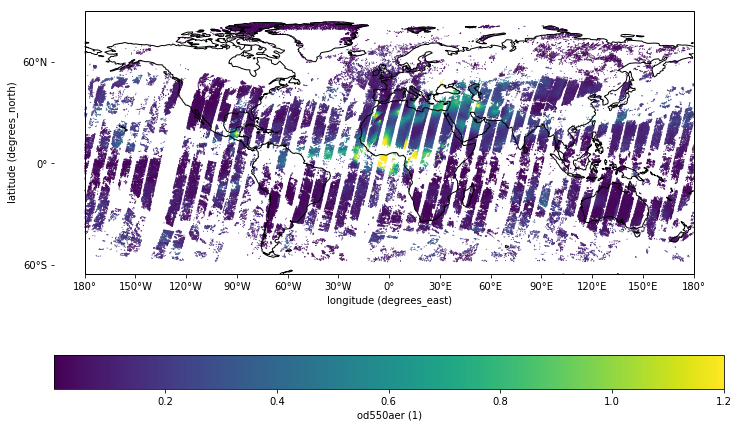

In [23]:
model_onto_aerosol_cci[::10].plot(itemwidth=1, vmax=1.2)

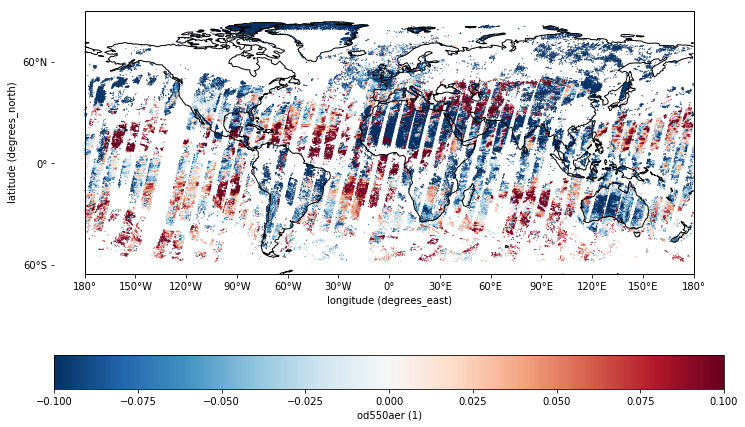

In [24]:
# Calculate the absolute difference
diff = model_onto_aerosol_cci - aerosol_cci_550
diff[::10].plot(itemwidth=1, vmax=0.1, vmin=-0.1, cmap='RdBu_r')